# Creating workflows with CWT.

This tutorial show how to create workflows for CWT.

You need to get your API key from [here](https://aims2.llnl.gov/user/profile) and possibly authenticated via my_proxy_client or OAuth2 if the files you're trying to use require it.

In [ ]:
import os
import cwt

wps_url = os.environ.get('WPS_URL', 'https://aims2.llnl.gov/wps')
verify = bool(os.environ.get('WPS_VERIFY', True))
compute_token = os.environ.get('WPS_TOKEN', '<token>')

client = cwt.WPSClient(wps_url, compute_token=compute_token, verify=verify)
client

In [2]:
# (600, 90, 144)
inputs = cwt.Variable('http://aims3.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/historical/r10i1p1f1/Amon/tas/gn/v20180830/tas_Amon_GISS-E2-1-G_historical_r10i1p1f1_gn_190101-195012.nc', 'tas')

In [3]:
# First we subset the input
subset = client.CDAT.subset(inputs, domain=cwt.Domain(time=('1910', '1925'), lat=(0, 90)))
subset

Process(name=54de379b-c714-4e99-a110-67e431486aca, identifier=CDAT.subset, inputs=[Variable(name='9b50f078-2739-4896-9d20-1d7518d405c3', uri='http://aims3.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/historical/r10i1p1f1/Amon/tas/gn/v20180830/tas_Amon_GISS-E2-1-G_historical_r10i1p1f1_gn_190101-195012.nc', var_name='tas', domain=None, mime_type=None)], parameters={}, domain=Domain(dimensions={'time': Dimension(name='time', start='1910', end='1925', step=1, crs=CRS(name='timestamps')), 'lat': Dimension(name='lat', start=0, end=90, step=1, crs=CRS(name='values'))}, mask=None, name='2a19e050-a9c0-4730-a3fc-9bb223195075'), title=CDAT.subset, process_outputs=[], data_inputs=[], status_supported=None, store_supported=None, process_version=devel)

In [4]:
maximum = client.CDAT.max(subset, axes=['lat'])
maximum

Process(name=f0be08bc-03d9-4d4f-85e4-672d1204658a, identifier=CDAT.max, inputs=[Process(name=54de379b-c714-4e99-a110-67e431486aca, identifier=CDAT.subset, inputs=[Variable(name='9b50f078-2739-4896-9d20-1d7518d405c3', uri='http://aims3.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/historical/r10i1p1f1/Amon/tas/gn/v20180830/tas_Amon_GISS-E2-1-G_historical_r10i1p1f1_gn_190101-195012.nc', var_name='tas', domain=None, mime_type=None)], parameters={}, domain=Domain(dimensions={'time': Dimension(name='time', start='1910', end='1925', step=1, crs=CRS(name='timestamps')), 'lat': Dimension(name='lat', start=0, end=90, step=1, crs=CRS(name='values'))}, mask=None, name='2a19e050-a9c0-4730-a3fc-9bb223195075'), title=CDAT.subset, process_outputs=[], data_inputs=[], status_supported=None, store_supported=None, process_version=devel)], parameters={'axes': NamedParameter(name='axes', values=('lat',))}, domain=None, title=CDAT.max, process_outputs=[], data_inputs=[], status_supporte

In [5]:
workflow = client.CDAT.workflow(maximum)
workflow

Process(name=9c6a2c2a-6c16-4801-aa9f-17d5c4e2d0b8, identifier=CDAT.workflow, inputs=[Process(name=f0be08bc-03d9-4d4f-85e4-672d1204658a, identifier=CDAT.max, inputs=[Process(name=54de379b-c714-4e99-a110-67e431486aca, identifier=CDAT.subset, inputs=[Variable(name='9b50f078-2739-4896-9d20-1d7518d405c3', uri='http://aims3.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/historical/r10i1p1f1/Amon/tas/gn/v20180830/tas_Amon_GISS-E2-1-G_historical_r10i1p1f1_gn_190101-195012.nc', var_name='tas', domain=None, mime_type=None)], parameters={}, domain=Domain(dimensions={'time': Dimension(name='time', start='1910', end='1925', step=1, crs=CRS(name='timestamps')), 'lat': Dimension(name='lat', start=0, end=90, step=1, crs=CRS(name='values'))}, mask=None, name='2a19e050-a9c0-4730-a3fc-9bb223195075'), title=CDAT.subset, process_outputs=[], data_inputs=[], status_supported=None, store_supported=None, process_version=devel)], parameters={'axes': NamedParameter(name='axes', values=('lat',

In [6]:
# and use proc_max.
client.execute(workflow)

workflow.wait()

ProcessAccepted None
ProcessAccepted Validating workflow
ProcessStarted Building output for 'f0be08bc-03d9-4d4f-85e4-672d1204658a' - 'CDAT.max' 0
ProcessSucceeded None


True

In [7]:
import cdms2

f = cdms2.open(workflow.output.uri)

tas = f[workflow.output.var_name]

# (192, 144)
print(tas.shape)

(192, 144)


/opt/conda/envs/jupyterlab/lib/python3.8/site-packages/cdms2/tvariable.py:281: DeprecationWarning: Non-scalar arrays for the fill value are deprecated. Use arrays with scalar values instead. The filled function still supports any array as `fill_value`.
  self._missing = numpy.array(value).astype(self.dtype)


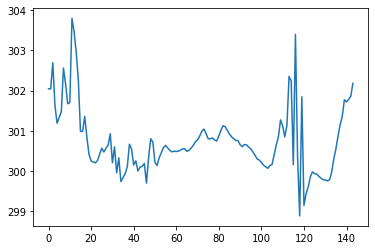

In [8]:
import matplotlib.pyplot as plt

fix, ax = plt.subplots()
ax.plot(tas[0].data)